In [1]:
import pandas as pd
import anndata
import numpy
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Parameter

In [2]:
delta_dmr_rate_cutoff = 0.3

In [3]:
# Parameters
delta_dmr_rate_cutoff = 0.3


## Load Data

In [4]:
dmr_hits = anndata.read_h5ad('RelatedClusterAndDMR.hypo_hits.h5ad')
dmr_hits = pd.DataFrame(dmr_hits.X.astype(bool).todense(), index=dmr_hits.obs_names, columns=dmr_hits.var_names)
dmr_hits.head()

index,CA1_Ak5,CA1_Chrm3,CA1_Kif26a,CA1_Lingo2,CA1_Ptprg,CA3_Cadm2,CA3_Efnb2,CA3-St18_Epha5,CA3-St18_Nuak1,CA3-St18_Tead1,DG-po_Bcl11a,DG-po_Calb2,DG-po_Kctd8,Gfra1_Gfra1,IG-CA2_Chrm3,IG-CA2_Peak1,IG-CA2_Xpr1
index,,,,,,,,,,,,,,,,,
Subchr1_3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
Subchr1_8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
Subchr1_14,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
Subchr1_23,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Subchr1_37,False,False,False,False,False,True,True,True,False,True,False,True,True,False,False,False,False


In [5]:
dmr_rate = pd.read_msgpack('RelatedClusterAndDMR.mcg_rate.msg')
dmr_rate.head()

,CA1_Ak5,CA1_Chrm3,CA1_Kif26a,CA1_Lingo2,CA1_Ptprg,CA3_Cadm2,CA3_Efnb2,CA3-St18_Epha5,CA3-St18_Nuak1,CA3-St18_Tead1,DG-po_Bcl11a,DG-po_Calb2,DG-po_Kctd8,Gfra1_Gfra1,IG-CA2_Chrm3,IG-CA2_Peak1,IG-CA2_Xpr1
index,,,,,,,,,,,,,,,,,
Subchr1_3,0.893162,0.879725,0.849057,1.000000,0.897163,0.861111,0.919540,0.821429,0.960000,0.868217,1.0,0.600000,0.636364,0.924528,0.456989,0.592593,0.75000
Subchr1_8,0.905405,0.590909,0.974359,0.777778,0.890052,0.872247,0.904762,0.857143,0.959184,0.956522,0.8,0.923077,1.000000,0.857143,0.342857,0.355263,0.65625
Subchr1_14,0.828571,0.419355,0.700000,1.000000,0.767442,0.482759,0.812500,0.888889,1.000000,0.739130,1.0,0.750000,0.000000,0.916667,0.700000,0.666667,0.70000
Subchr1_23,0.956522,0.859375,0.800000,0.400000,0.860465,0.851852,0.444444,0.666667,0.545455,0.928571,0.5,1.000000,1.000000,0.888889,0.725000,0.884615,0.70000
Subchr1_37,0.716216,0.584270,0.846154,0.875000,0.694444,0.248000,0.285714,0.277778,0.562500,0.102564,0.5,0.200000,0.166667,0.736842,0.794118,0.774194,0.70000


In [6]:
dmg = pd.read_msgpack('RelatedDMG.msg')
dmg['cluster_from'] = dmg['cluster_from'].str.replace(' ', '_')
dmg['cluster_to'] = dmg['cluster_to'].str.replace(' ', '_')
print(dmg.shape)
dmg.head()

(7876, 9)


,pvals_adj,gene_id,cluster_from,cluster_to,gene_name,-lgp,AUROC,rate_from,rate_to
0,0.0,ENSMUSG00000098760.1,CA1_Chrm3,CA3_Cadm2,Gm2164,1000.0,0.999988,0.008284,0.041257
1,0.0,ENSMUSG00000009681.10,CA1_Chrm3,CA3_Cadm2,Bcr,1000.0,0.999958,0.008852,0.043598
3,0.0,ENSMUSG00000048251.15,CA1_Chrm3,CA3_Cadm2,Bcl11b,1000.0,0.999449,0.005740,0.040069
4,0.0,ENSMUSG00000104283.1,CA1_Chrm3,CA3_Cadm2,Gm37459,1000.0,0.999421,0.006409,0.068974
5,0.0,ENSMUSG00000027674.16,CA1_Chrm3,CA3_Cadm2,Pex5l,1000.0,0.998962,0.006091,0.048110


In [7]:
corr = pd.read_msgpack('RelatedCorr.msg')
corr.head()

,DMR,Gene,Corr,chrom,DMR_to_gene_dist
0,Subchr1_9357,ENSMUSG00000067879.3,0.321723,chr1,-475017.5
1,Subchr1_9359,ENSMUSG00000067879.3,0.488895,chr1,-473551.5
2,Subchr1_9360,ENSMUSG00000067879.3,0.521646,chr1,-473381.5
3,Subchr1_9363,ENSMUSG00000067879.3,0.402748,chr1,-470607.0
4,Subchr1_9378,ENSMUSG00000067879.3,0.346382,chr1,-459379.0


In [8]:
# subset the dmr and dmg based on corr
dmr_hits = dmr_hits.loc[corr['DMR'].unique()].copy()
dmr_rate = dmr_rate.loc[corr['DMR'].unique()].copy()
dmg = dmg[dmg['gene_id'].isin(corr['Gene'].unique())].copy()

In [9]:
dmg[['cluster_from', 'cluster_to']].drop_duplicates().shape

(257, 2)

## prepare DMR pairwise

In [10]:
pairwise_dmr_index = {}
n = 0
for _, (cluster_from, cluster_to) in dmg[['cluster_from', 'cluster_to']].drop_duplicates().iterrows():
    n += 1
    if n % 1000 == 0:
        print(n)
    # cluster_from is hypo, cluster_to is hyper
    rate_delta = (dmr_rate[cluster_to] - dmr_rate[cluster_from]) > delta_dmr_rate_cutoff
    # cluster_to is not hypo, cluster_from is hypo, and rate_delta > delta_dmr_rate_cutoff
    total_judge = (~dmr_hits[cluster_to]) & dmr_hits[cluster_from] & rate_delta
    
    # remaining dmr is sig hypo in cluster_from and hyper in cluster_to
    pairwise_dmr_index[(cluster_from, cluster_to)] = total_judge[total_judge].index

## final DMG DMR for pairwise cluster

In [11]:
related_genes = pd.read_csv('related_dmgs.txt', header=None, index_col=0).index
related_genes.name = 'gene_id'
# create a table to store all related genes
gene_dmr_counts = pd.DataFrame([], index=related_genes)

In [12]:
with pd.HDFStore('FinalDMGDMR.h5') as f:
    n = 0
    for (cluster_from, cluster_to), cluster_pair_df in dmg.groupby(
        ['cluster_from', 'cluster_to']):
        n += 1
        if n % 500 == 0:
            print(n)
        # first get related dmr and dmg separately
        cluster_pair_related_dmr = pairwise_dmr_index[(cluster_from, cluster_to)]
        cluster_pair_related_gene = cluster_pair_df['gene_id'].unique()
        
        # use them to filter corr
        cluster_pair_related_corr = corr[
            corr['DMR'].isin(cluster_pair_related_dmr)
            & corr['Gene'].isin(cluster_pair_related_gene)]
        
        # then use remained dmr and dmg as final list
        # the remaining DMR DMG is:
        # - sig hypo in one clsuter compare to another
        # - have sig correlateion
        cluster_pair_related_dmr = pd.Series(cluster_pair_related_corr['DMR'].unique())
        cluster_pair_related_gene = pd.Series(cluster_pair_related_corr['Gene'].unique())
        # print(cluster_from, cluster_to, cluster_pair_related_dmr.size, cluster_pair_related_gene.size)
        f[f'{cluster_from}/{cluster_to}/DMR'] = cluster_pair_related_dmr
        f[f'{cluster_from}/{cluster_to}/Gene'] = cluster_pair_related_gene
        f[f'{cluster_from}/{cluster_to}/Corr'] = pd.Series(cluster_pair_related_corr.index)
        
        gene_counts = cluster_pair_related_corr['Gene'].value_counts()
        gene_dmr_counts[(cluster_from, cluster_to)] = gene_counts.reindex(
            related_genes).fillna(0).astype(int)

## Save DMG DMR counts table

In [13]:
gene_pos = (gene_dmr_counts > 0).sum(axis=1)
gene_dmr_counts = gene_dmr_counts[gene_pos > 0].copy()
gene_dmr_counts.to_msgpack('DMRCounts_for_DMG_in_cluster_pairs.msg')
gene_dmr_counts.shape

(621, 257)

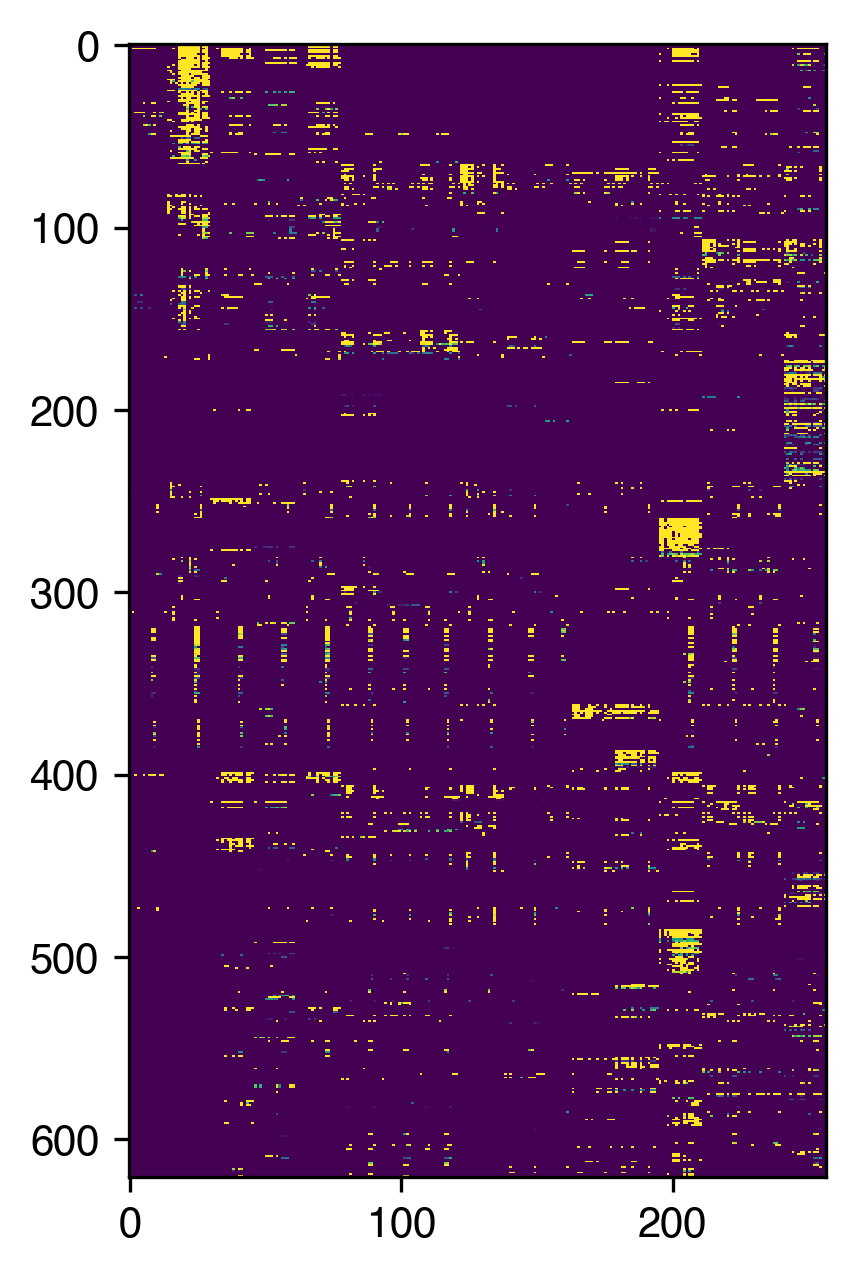

In [14]:
plt.figure(figsize=(3, 5), dpi=300)
plt.imshow(gene_dmr_counts.values, vmin=3, vmax=30, aspect='auto')